In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('heart.xlsx')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
 df.shape


(4238, 16)

In [ ]:
df.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.apply(lambda x: len(x.unique()))

male                  2
age                  39
education             5
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1364
heartRate            74
glucose             144
TenYearCHD            2
dtype: int64

In [ ]:
 df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

[]

In [ ]:
totChol_mean= df.pivot_table(values = "totChol",index="age",aggfunc=np.mean)
totChol_mean

,totChol
age,
32,242.000000
33,177.400000
34,194.833333
35,214.146341
36,208.297619
37,214.648352
38,215.202797
39,221.246988
40,217.508021


In [ ]:
miss_bool = df['totChol'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: totChol, Length: 4238, dtype: bool

In [ ]:
edu_mean= df.pivot_table(values = 'education',index='male',aggfunc=np.mean)
edu_mean

,education
male,
0,1.963667
1,1.999434


In [ ]:
miss_bool = df['education'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: education, Length: 4238, dtype: bool

In [ ]:
cigsPerDay_mean= df.pivot_table(values = 'cigsPerDay',index='currentSmoker')
cigsPerDay_mean

,cigsPerDay
currentSmoker,
0,0.000000
1,18.350605


In [ ]:
miss_bool = df['cigsPerDay'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: cigsPerDay, Length: 4238, dtype: bool

In [ ]:
bmi_mean= df.pivot_table(values = 'BPMeds',index='male',aggfunc=np.mean)
bmi_mean

,BPMeds
male,
0,0.037379
1,0.019401


In [ ]:
miss_bool = df['BPMeds'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235     True
4236    False
4237    False
Name: BPMeds, Length: 4238, dtype: bool

In [ ]:
cigsPerDay_mean= df.pivot_table(values = 'BMI',index='age',aggfunc=np.mean)
cigsPerDay_mean

,BMI
age,
32,29.840000
33,23.388000
34,23.402222
35,23.925366
36,25.159762
37,25.342283
38,25.163986
39,24.928274
40,24.993351


In [ ]:
miss_bool = df['BMI'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: BMI, Length: 4238, dtype: bool

In [ ]:
heartrate_mean= df.pivot_table(values = 'heartRate',index='male',aggfunc=np.mean)
heartrate_mean

,heartRate
male,
0,77.094667
1,74.261276


In [ ]:
miss_bool = df['heartRate'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: heartRate, Length: 4238, dtype: bool

In [ ]:
glucose_mean= df.pivot_table(values = 'glucose',index='diaBP',aggfunc=np.mean)
glucose_mean

,glucose
diaBP,
48.0,65.0
51.0,206.0
52.0,70.0
53.0,82.0
54.0,95.0
...,...
133.0,71.0
135.0,81.5
136.0,80.5


In [ ]:
miss_bool = df['glucose'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236     True
4237    False
Name: glucose, Length: 4238, dtype: bool

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


[0 1] [3594  644]


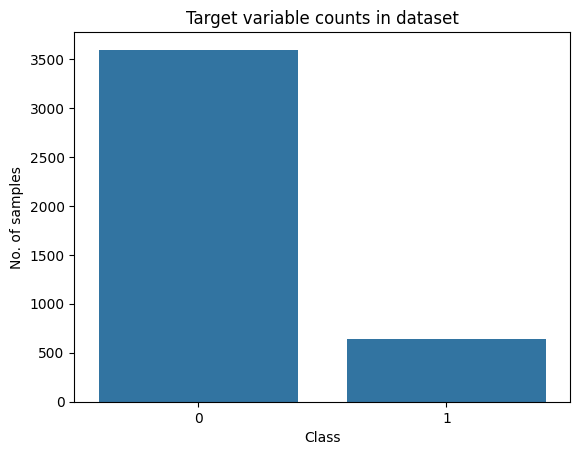

In [ ]:
(unique,counts)=np.unique(df['TenYearCHD'],return_counts=True)
print(unique,counts)
sns.barplot(x=unique,y=counts)
plt.xlabel('Class')
plt.ylabel('No. of samples')
plt.xticks()
plt.title('Target variable counts in dataset')
plt.show()

In [ ]:
df.isnull().mean()*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [ ]:
columns = [var for var in df.columns if df[var].isnull().mean() * 100 < 5 and df[var].isnull().mean()>0 ]
columns

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

In [ ]:
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='TenYearCHD')
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)

print(X_train.shape, X_test.shape)

(2990, 15) (997, 15)


In [ ]:
X_train.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1515,0,47,1.0,1,43.0,0.0,0,0,0,252.0,132.5,85.0,20.05,72.0,80.0
3365,1,36,1.0,0,0.0,0.0,0,0,0,233.0,128.0,86.5,35.31,83.0,76.0
23,0,52,3.0,1,20.0,0.0,0,0,0,215.0,132.0,82.0,25.11,71.0,75.0
911,0,35,3.0,1,5.0,0.0,0,0,0,154.0,125.0,75.0,23.10,110.0,75.0
711,1,57,1.0,1,43.0,0.0,0,1,0,185.0,134.0,90.5,27.77,87.0,103.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,mean_absolute_error,mean_squared_error

acc_logreg = accuracy_score(y_test,y_pred)
print(acc_logreg)

0.839518555667001


In [ ]:
lr.classes_

array([0, 1])

In [ ]:
!pip install scikit-learn
import sklearn.metrics as metrics

cm=metrics.confusion_matrix(y_test,y_pred, labels=lr.classes_)
print(cm)

[[829  12]
 [148   8]]


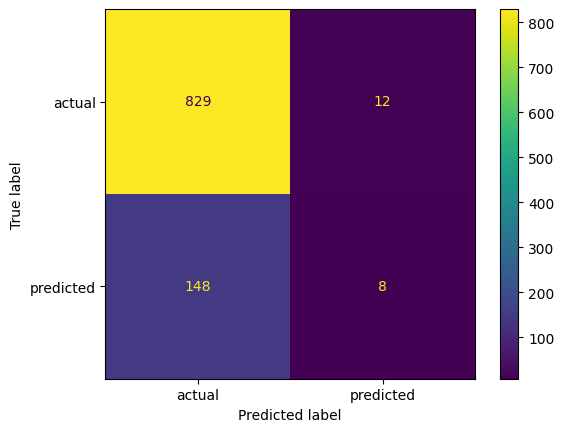

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels= ['actual','predicted'])
cm_disp.plot()

In [ ]:
import statsmodels.api as sm

In [ ]:
logit_model=sm.Logit(y,X)
result= logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392924
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3987
Model:                          Logit   Df Residuals:                     3972
Method:                           MLE   Df Model:                           14
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                 0.06753
Time:                        18:02:28   Log-Likelihood:                -1566.6
converged:                       True   LL-Null:                       -1680.0
Covariance Type:            nonrobust   LLR p-value:                 1.671e-40
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.3754      0.101      3.721      0.000       0.178       0.573
age           

In [ ]:
# prompt: write code to aplly multiple linear regression to this data set to predict TenyearCHD

import statsmodels.api as sm

# Define the model formula
formula = 'TenYearCHD ~ ' + ' + '.join(X.columns)

# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     28.67
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           9.20e-78
Time:                        18:02:32   Log-Likelihood:                -1338.1
No. Observations:                3987   AIC:                             2708.
Df Residuals:                    3971   BIC:                             2809.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5752      0.076     